<a href="https://colab.research.google.com/github/hksawadi/gc_projects/blob/main/EVC_Project_1_HashimSawadi_%5BStudent_Performance%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Learning Objectives:

 
* Formulate  the problem
* Load the Data
* Data Exploration
* Clean The Data
* Discover and Visualize the Data to Gain Insights
* Looking for Correlations
* Prepare the Data for Machine Learning Algorithms
* Save Cleaned Data and Download it




#Student Performance

<h3>About Data </h3>


 <h2>Read Dataset Description</h2>
We want to predict students performance in math in secondary education of two high schools. Please read the description of data set before start.

 [Dataset Description](https://archive.ics.uci.edu/ml/datasets/student+performance)

<h3>Import data</h3>
<p>
here link of raw data set: <a href="https://raw.githubusercontent.com/Ruqyai/Course-DS/master/math-raw.csv"> here</a>. 

</p>

#Formulate  the problem

We want to predict the Math Final Grade

So How predict the Math Final Grade?!!

Notice the data is labeled (**Supervised Learning**)

Notice the desired output is number (**Regression**)






###Import libraries




In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Load the Data

###Load the dataset

In [55]:
file_path = 'https://raw.githubusercontent.com/Ruqyai/Course-DS/master/math-raw.csv'

In [56]:
#Use the Pandas method read_csv() to load the data from the web address.
df = pd.read_csv(file_path)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,?,4,1,1,3,NaN,5.0,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,5,?,3,1,1,3,NaN,5.0,5,6
2,GP,Female,15.0,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10.0,7.0,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2.0,15.0,14,15
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4.0,6.0,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20.0,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11.0,9.0,9,9
391,MS,M,17.0,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3.0,14.0,16,16
392,MS,M,21.0,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3.0,10.0,8,7
393,MS,M,18.0,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0.0,11.0,12,10


#Clean  the data

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      373 non-null    object 
 1   sex         394 non-null    object 
 2   age         394 non-null    float64
 3   address     394 non-null    object 
 4   famsize     395 non-null    object 
 5   Pstatus     395 non-null    object 
 6   Medu        395 non-null    int64  
 7   Fedu        395 non-null    int64  
 8   Mjob        395 non-null    object 
 9   Fjob        395 non-null    object 
 10  reason      395 non-null    object 
 11  guardian    395 non-null    object 
 12  traveltime  395 non-null    int64  
 13  studytime   395 non-null    int64  
 14  failures    393 non-null    float64
 15  schoolsup   395 non-null    object 
 16  famsup      395 non-null    object 
 17  paid        395 non-null    object 
 18  activities  395 non-null    object 
 19  nursery     395 non-null    o


##Missing  Values


#Identify and handle missing values

As we can see, several question marks appeared in the dataframe; those are missing values which may hinder our further analysis. 
<div>So, how do we identify all those missing values and deal with them?</div> 


<h1>How to work with missing data?</h1>

Steps for working with missing data:
<ol>
    <li>identify missing data</li>
    <li>deal with missing data</li>
    <li>correct data format</li>
</ol>

<h1 id="identify_missing_values">1. Identify missing values</h1>

In [58]:
# TODO : Identify missing values
df.isnull().sum()

school        22
sex            1
age            1
address        1
famsize        0
Pstatus        0
Medu           0
Fedu           0
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime     0
studytime      0
failures       2
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher         0
internet       0
romantic       0
famrel         0
freetime       0
goout          0
Dalc           0
Walc           0
health         0
absences       2
G1             2
G2             0
G3             0
dtype: int64

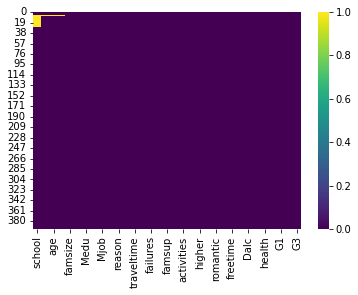

In [59]:
# TODO: Check if there is any missing value By heatmap

sns.heatmap(df.isnull(), cmap='viridis')

   
   <h4>Convert "?" to NaN</h4>In the house dataset, missing data comes with the question mark "?".We replace "?" with NaN (Not a Number), which is Python's default missing value marker, for reasons of computational speed and convenience. Here we use the function:  <pre>.replace(A, B, inplace = True) </pre>to replace A by B




In [60]:
import numpy as np

# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,NaN,4,1,1,3,NaN,5.0,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,5,NaN,3,1,1,3,NaN,5.0,5,6
2,GP,Female,15.0,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10.0,7.0,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2.0,15.0,14,15
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4.0,6.0,10,10
5,GP,Male,16.0,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10.0,15.0,15,15
6,GP,M,16.0,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0.0,12.0,12,11
7,NaN,NaN,NaN,NaN,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6.0,6.0,5,6
8,NaN,M,15.0,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0.0,16.0,18,19
9,NaN,M,15.0,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0.0,14.0,15,15


<h1 id="deal_missing_values">2. Deal with missing data</h1>
<b>How to deal with missing data?</b>

<ol>
    <li>drop data<br>
        a. drop the whole row<br>
        b. drop the whole column
    </li>
    <li>replace data (impute)<br>
        a. replace it by mean or median <br>
        b. replace it by frequency<br>
        c. replace it based on inference or other functions 
    </li>
</ol>

<h3>Drop the whole row</h3>

In [61]:
# TODO:Drop the whole row
df.dropna(subset=['school'], axis=0, inplace=True)

In [62]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      2
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      2
goout         0
Dalc          0
Walc          0
health        0
absences      2
G1            0
G2            0
G3            0
dtype: int64

<h3>Drop the whole column</h3>

In [63]:
# TODO: Drop the whole column

df.drop(["reason"], axis=1, inplace=True)

<h3> Replace it by mean </h3>

In [64]:
# TODO: Replace it by mean

df['absences'] = df['absences'].fillna(df['absences'].mean())

In [65]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
guardian      0
traveltime    0
studytime     0
failures      2
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      2
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

<h3>Replace by frequency</h3>

In [66]:
# TODO: Replace by frequency

df['failures'].value_counts()

0.0    290
1.0     50
2.0     16
3.0     15
Name: failures, dtype: int64

In [67]:
df['failures'] = df['failures'].fillna(df['failures'].value_counts().idxmax())

In [68]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      2
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

<h3> Replace by sklearn.impute </h3>

In [69]:
# TODO: Replace by sklearn.impute

from sklearn.impute import SimpleImputer
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
df['freetime'] = imr.fit_transform(df[['freetime']])

df['freetime'].isnull().sum()

0

In [70]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

<h1 id="correct_data_format">3. Correct data format</h1>
<b>We are almost there!</b>
<p>The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).</p>

In Pandas, we use 
<p><b>.dtype</b> to check the data type</p>
<p><b>.astype</b> to change the data type</p>

In [71]:
# TODO: Correct data format

df['absences'].dtypes

dtype('float64')

In [72]:
df['absences'] = df['absences'].astype("int")
df['absences'].dtypes

dtype('int64')

In [73]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,3.242588,4,1,1,3,5,5.0,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,5,3.242588,3,1,1,3,5,5.0,5,6
2,GP,Female,15.0,U,LE3,T,1,1,at_home,other,...,4,3.000000,2,2,3,3,10,7.0,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2.000000,2,1,1,5,2,15.0,14,15
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,4,3.000000,2,1,2,5,4,6.0,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20.0,U,LE3,A,2,2,services,services,...,5,5.000000,4,4,5,4,11,9.0,9,9
391,MS,M,17.0,U,LE3,T,3,1,services,services,...,2,4.000000,5,3,4,2,3,14.0,16,16
392,MS,M,21.0,R,GT3,T,1,1,other,other,...,5,5.000000,3,3,3,3,3,10.0,8,7
393,MS,M,18.0,R,LE3,T,3,2,services,other,...,4,4.000000,1,3,4,5,0,11.0,12,10


<h2 id="indicator">Indicator variable (or dummy variable)</h2>
<b>What is an indicator variable?</b>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>

<b>Why we use indicator variables?</b>
<p>
    because we cannot use categorical variables for regression analysis as string.
</p>

In [ ]:
# TODO: Use dummy variables

<h3>LabelEncoder</h3>

In [ ]:
 # TODO: Use LabelEncoder

<h3>OneHotEncoder</h3>

In [ ]:
# TODO: Use LabelEncoder

<h3>Remove any duplicates</h3>


In [94]:
# TODO: Remove any duplicates

df.duplicated().value_counts()
# In case there is a duplicates, use: "df = df.drop_duplicates()"

False    373
dtype: int64

<h3>Data Standardization</h3>
<p>
Data is usually collected from different agencies with different formats.
(Data Standardization is also a term for a particular type of data normalization)
</p>
    
<b>What is Standardization?</b>
<p>Standardization is the process of transforming data into a common format which allows the researcher to make the meaningful comparison.
</p>

In [74]:
# Data Standardization

df['sex'].unique()

array(['F', 'Female', 'Male', 'M'], dtype=object)

In [75]:
df.replace("Male","M",inplace=True)
df.replace("Female","F",inplace=True)

In [76]:
df['sex'].unique()

array(['F', 'M'], dtype=object)

<h3>Data Normalization </h3>

<b>Why normalization?</b>
<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling variable so the variable values range from 0 to 1
</p>

In [95]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df[['famrel']] = min_max_scaler.fit_transform(df[["famrel"]])
df[['famrel']]

,famrel
0,0.75
1,1.00
2,0.75
3,0.50
4,0.75
...,...
390,1.00
391,0.25
392,1.00
393,0.75




---

---





##Exploratory Data Analysis (EDA) and Data Visualization


Categorical variables are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.


<h3>Identify Outliers <h3>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


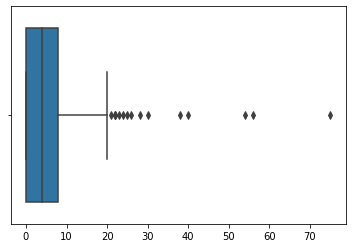

In [77]:
# TODO: Identify Outliers

sns.boxplot(df['absences'].values)

<h3>Remove Outliers</h3>

In [78]:
# TODO:  Remove Outliers

df['absences'] = df['absences'].clip(0, 20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


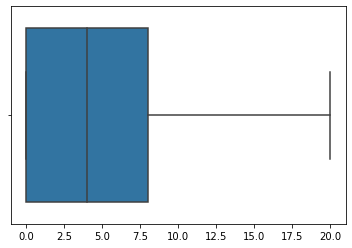

In [79]:
sns.boxplot(df['absences'].values)

##Discover and Visualize the Data to Gain Insights

<h4>Individual Variables </h4>


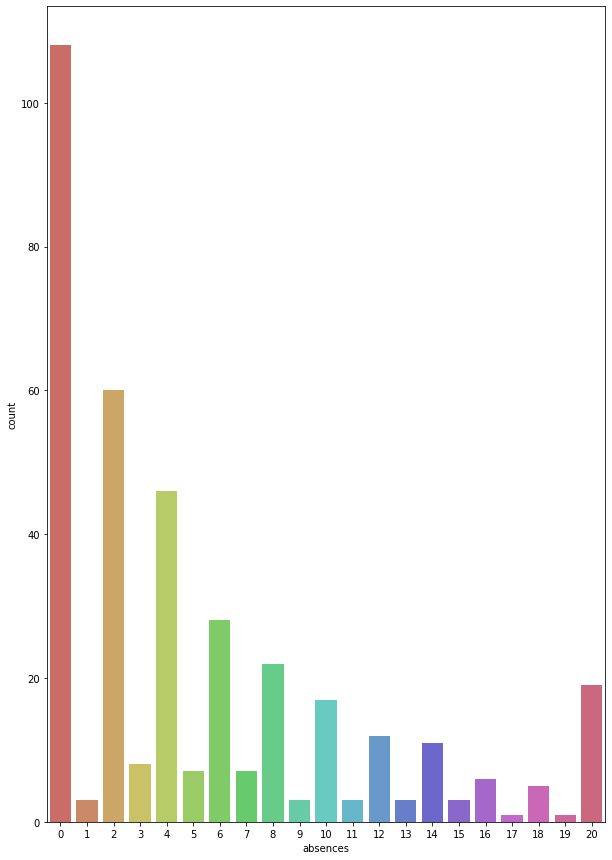

In [84]:
# TODO: Show Individual Variable as graph 

plt.figure(figsize=(10,15))
sns.countplot(x='absences',data=df, palette='hls')

<h4>Relationships Between Variables</h4>

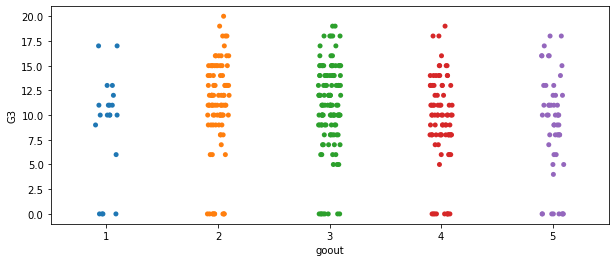

In [86]:
 # TODO: Show relationship between two Variables

plt.figure(figsize=(10, 4))
sns.stripplot(x="goout", y="G3", data=df);

<h4>Weak and Strong Relationships<h4>

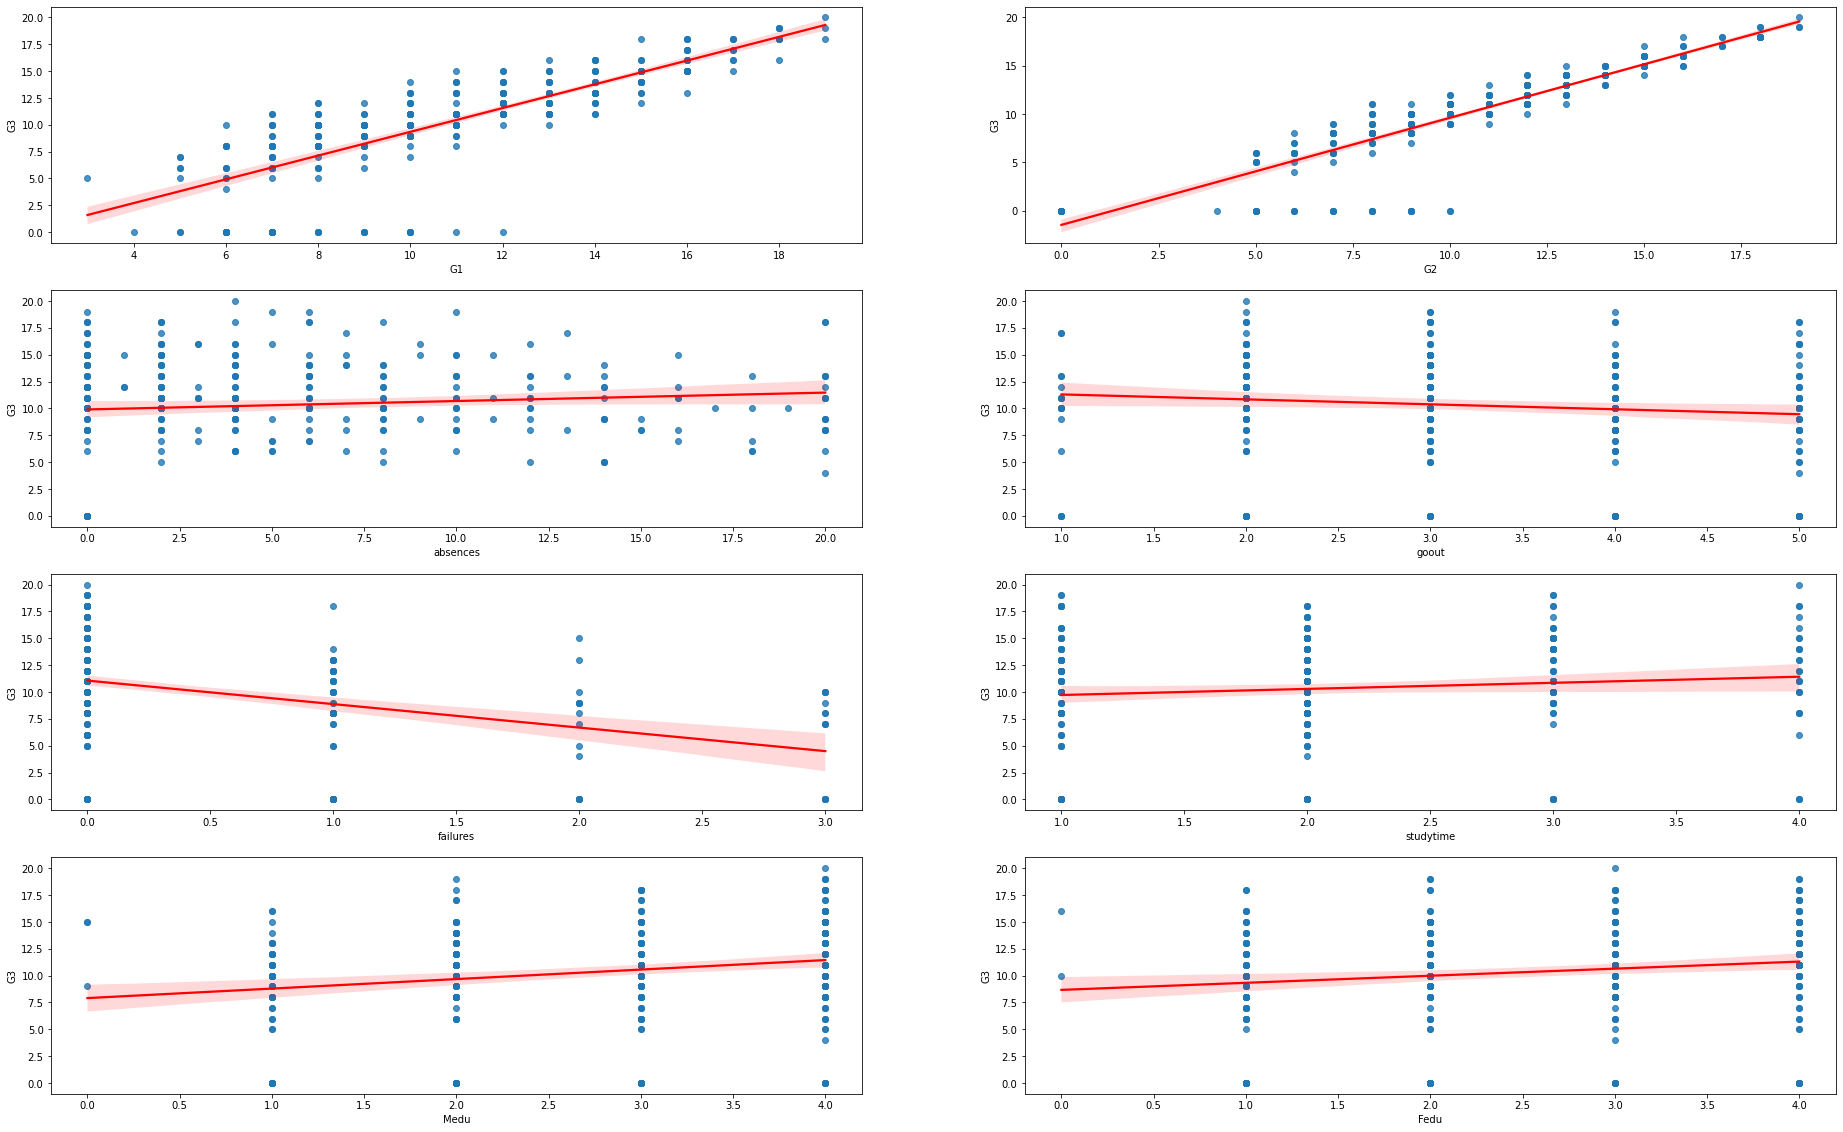

In [87]:
# TODO: Show some weak and Strong Relationships

plt.figure(figsize=(32,20))

plt.subplot(421)
sns.regplot(x='G1', y='G3', data=df,  line_kws={'color': 'red'}) 

plt.subplot(422)
sns.regplot(x='G2', y='G3', data=df , line_kws={'color': 'red'})
                    
plt.subplot(423)
sns.regplot(x='absences', y='G3', data=df,  line_kws={'color': 'red'})

plt.subplot(424)
sns.regplot(x='goout', y='G3', data=df , line_kws={'color': 'red'})
          
plt.subplot(425)
sns.regplot(x='failures', y='G3', data=df , line_kws={'color': 'red'})

plt.subplot(426)
sns.regplot(x='studytime', y='G3', data=df , line_kws={'color': 'red'})

plt.subplot(427)
sns.regplot(x='Medu', y='G3', data=df , line_kws={'color': 'red'})

plt.subplot(428)
sns.regplot(x='Fedu', y='G3', data=df , line_kws={'color': 'red'})

##Looking for Correlations

<h3>Correlation and Causation</h3>

<b> Correlation: </b> a measure of the extent of interdependence between variables.

<b> Causation: </b>the relationship between cause and effect between two variables.

It is important to know the difference between these two and that correlation does not imply causation. Determining correlation is much simpler the determining causation as causation may require independent experimentation.

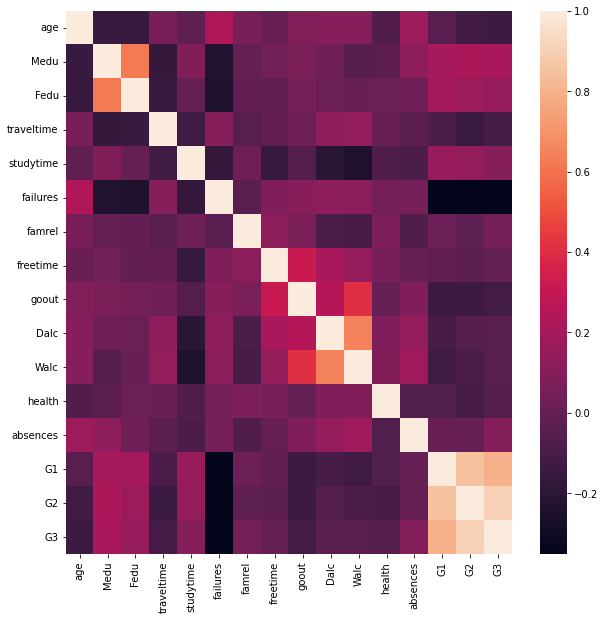

In [88]:
# OTDO : Show the Correlation between variables

plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

In [89]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,16.764075,2.721180,2.495979,1.455764,2.048257,0.340483,3.941019,3.242588,3.136729,1.501340,2.308311,3.552279,5.289544,10.882038,10.635389,10.316354
std,1.271311,1.101078,1.089100,0.700461,0.844227,0.743717,0.887037,0.981231,1.109619,0.908812,1.296754,1.375897,5.756420,3.333929,3.766153,4.619579
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,13.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,20.000000,19.000000,19.000000,20.000000


In [90]:
print('Max G3 : ', df['G3'].max())
print('Min G3 : ', df['G3'].min())
print('Mean G3 :',df['G3'].mean())

Max G3 :  20
Min G3 :  0
Mean G3 : 10.316353887399464


#Feature  Engineering

* Construct new features
* Combine two features or uncombine a feature
*	Select features

<h3>Conclusion: Important Variables</h3>
We now have a better idea of what our data looks like and which variables are important to take into account when predicting the house price. 

##Select features

In [91]:
# TODO: Select the important features
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [92]:
sel_col = ['G3','G1','G2','absences','studytime','Medu','Fedu']
f_df = df[sel_col]

In [93]:
f_df

,G3,G1,G2,absences,studytime,Medu,Fedu
0,6,5.0,6,5,2,4,4
1,6,5.0,5,5,2,1,1
2,10,7.0,8,10,2,1,1
3,15,15.0,14,2,3,4,2
4,10,6.0,10,4,2,3,3
...,...,...,...,...,...,...,...
390,9,9.0,9,11,2,2,2
391,16,14.0,16,3,1,3,1
392,7,10.0,8,3,1,1,1
393,10,11.0,12,0,1,3,2


<h3>Save Cleaned Data and Download it <h3>

In [96]:
f_df.to_csv('cleaned_data.csv')

In [97]:
from google.colab import files
files.download('cleaned_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Choose and  fit model
We will continue tomorrow ...

